In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Set random seed for reproducibility
SEED = 42

In [3]:
from google.colab import files
uploaded = files.upload()

# Assume the file is named 'diabetes.csv' or adjust the name accordingly
file_name = 'diabetes.csv'
data = pd.read_csv(file_name, delimiter=';')

# Display the first few rows
data.head()


Saving diabetes.csv to diabetes.csv


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,48.598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,38.918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,46.728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,48.903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,42.905,80,135


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [5]:
# Eksplorasi Data
# Melihat 5 baris pertama data
print(data.head())

# Statistik deskriptif
print(data.describe())


   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  48.598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  38.918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  46.728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  48.903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  42.905  80  135
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  

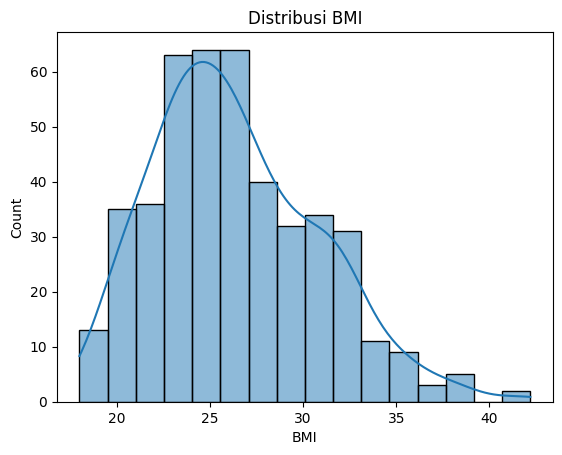

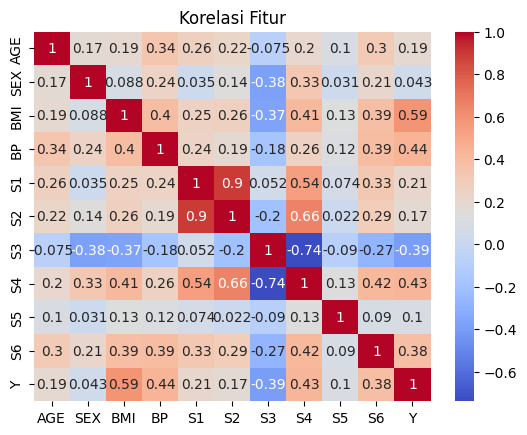

In [6]:
# Distribusi data
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi BMI
sns.histplot(data['BMI'], kde=True)
plt.title("Distribusi BMI")
plt.show()

# Korelasi antar fitur
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur")
plt.show()


In [8]:
data.describe()



,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,41.336785,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,14.235495,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,40.817000,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,49.345000,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


In [9]:
print(data.columns)


Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


In [10]:
y = data['Y']
X = data[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fitur dan target
X = data[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]  # Fitur
y = data['Y']  # Target

# Split dataset menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Sample X_train (first 5 rows):")
print(X_train[:5])

Shape of X_train: (353, 10)
Shape of X_test: (89, 10)
Sample X_train (first 5 rows):
[[ 1.49836523  1.06136988  0.21990201  1.13887373  0.72847289  1.05589332
  -0.82445065  0.71103773  0.57028058 -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 -0.71059105 -0.4249289   0.27242452
  -1.52979055  1.4842858   0.36797245  0.36723647]
 [ 0.08518241 -0.94217861  1.01898711  1.99247286 -0.30958872 -0.32669867
  -0.11911075 -0.06221033  0.49315571 -0.31866022]
 [-0.621409   -0.94217861 -0.78466212 -0.63945779 -1.17464007 -1.21550781
   0.66460025 -0.83545839 -0.00648819 -2.71929861]
 [-0.54289885 -0.94217861 -1.4239302  -1.7064567  -0.79978448 -1.11016747
   1.29156905 -1.60870645  0.0886756  -0.91881982]]


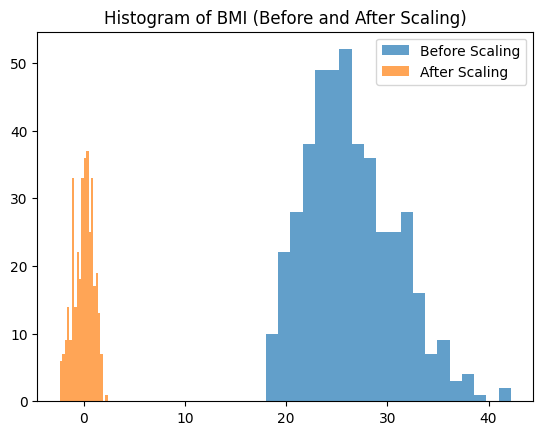

In [13]:
import matplotlib.pyplot as plt

# Sebelum standarisasi
plt.hist(data['BMI'], bins=20, alpha=0.7, label='Before Scaling')

# Setelah standarisasi
plt.hist(X_train[:, 0], bins=20, alpha=0.7, label='After Scaling')  # Kolom pertama dari X_train (BMI)
plt.legend()
plt.title('Histogram of BMI (Before and After Scaling)')
plt.show()

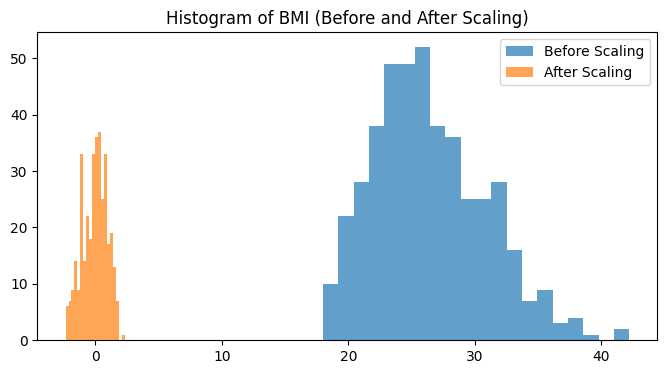

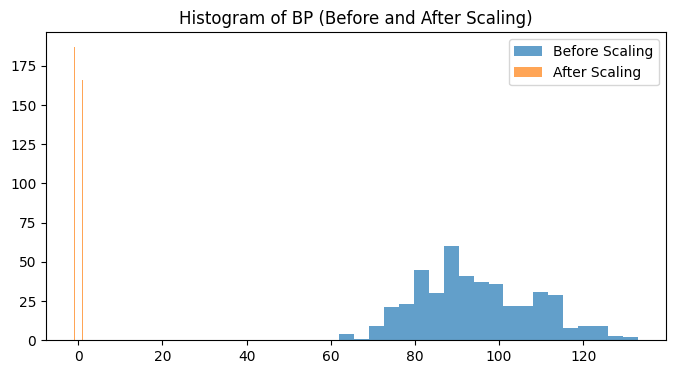

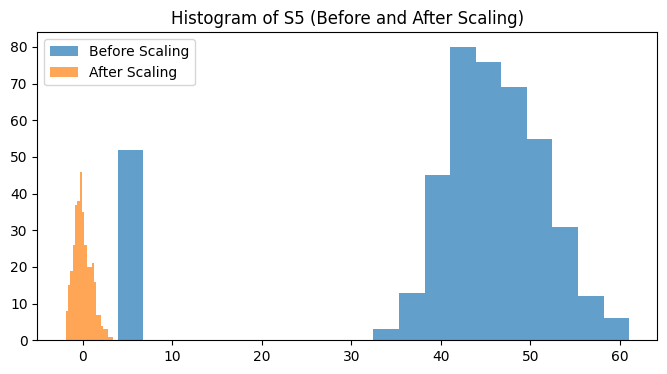

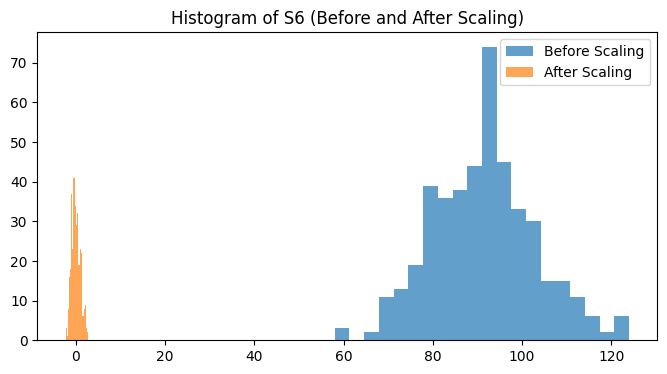

In [14]:
features = ['BMI', 'BP', 'S5', 'S6']  # Fitur asli
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 4))
    plt.hist(data[feature], bins=20, alpha=0.7, label='Before Scaling')
    plt.hist(X_train[:, i], bins=20, alpha=0.7, label='After Scaling')  # Kolom ke-i dari X_train
    plt.title(f'Histogram of {feature} (Before and After Scaling)')
    plt.legend()
    plt.show()


In [18]:
# membandingkan model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dictionary untuk menyimpan hasil akurasi setiap model
results = {}

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

# Print Akurasi Model
print("\nModel Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")


Logistic Regression:
              precision    recall  f1-score   support

          37       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       2.0
          49       0.00      0.00      0.00       0.0
          52       0.00      0.00      0.00       2.0
          55       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       0.0
          59       0.00      0.00      0.00       0.0
          60       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          63       0.00      0.00      0.00       2.0
          64       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       1.0
          70       0.00      0.00      0.00       1.0
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Random Forest:
              precision    recall  f1-score   support

          37       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       2.0
          49       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       0.0
          52       0.00      0.00      0.00       2.0
          53       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       0.0
          59       0.00      0.00      0.00       0.0
          60       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          63       0.00      0.00      0.00       2.0
          64       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter

# Buat dataset contoh
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=42)

# Pisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan distribusi awal
print("Distribusi sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Atur k_neighbors jika perlu
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_balanced))


Distribusi sebelum SMOTE: Counter({1: 64, 0: 6})
Distribusi setelah SMOTE: Counter({1: 64, 0: 64})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [20]:
(X_train_balanced, y_train_balanced)

(array([[ 2.40202628, -1.37386752, -0.08613845, ..., -0.87631867,
         -0.17901197,  1.78162509],
        [ 0.12644902, -1.26934229,  0.8278501 , ...,  1.63092918,
         -0.0070428 ,  1.88661465],
        [ 0.88580314, -0.96332199,  0.78287024, ...,  1.22180055,
         -0.96549799, -1.11305443],
        ...,
        [ 0.49604456, -1.9976801 ,  0.97885413, ..., -0.43939826,
         -0.25598936, -0.38385629],
        [-0.02830232, -1.74480203, -0.43768437, ...,  0.75106081,
         -0.66576545,  0.18835011],
        [ 0.4987289 , -2.0004048 ,  1.00401749, ..., -0.44896806,
         -0.2579616 , -0.38783718]]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Melatih model KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]


In [39]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Dictionary untuk menyimpan hasil akurasi setiap model
results = {}

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

# Print Akurasi Model
print("\nModel Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")


Confusion Matrix:
[[ 0  4]
 [ 0 26]]

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.96      1.00      0.98        26

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30


Model Accuracies:
KNN: 0.97


In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat dan melatih model kneighbors classifier
kkn = KNeighborsClassifier(n_neighbors=42)
kkn.fit(X_train_balanced, y_train_balanced)

# Simpan kneighbors classifier sebagai model terbaik
best_model = kkn

# Cek jika model terdefinisi
print(best_model)


KNeighborsClassifier(n_neighbors=42)


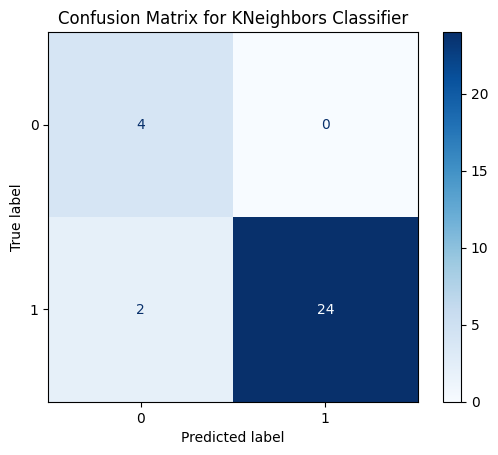

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()


In [34]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Tidak Parah', 'Parah'])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

 Tidak Parah       1.00      0.75      0.86         4
       Parah       0.96      1.00      0.98        26

    accuracy                           0.97        30
   macro avg       0.98      0.88      0.92        30
weighted avg       0.97      0.97      0.96        30



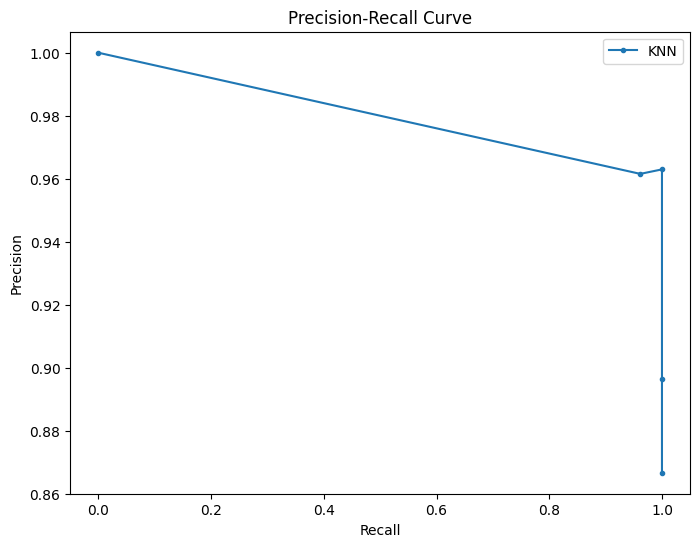

In [36]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='KNN')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

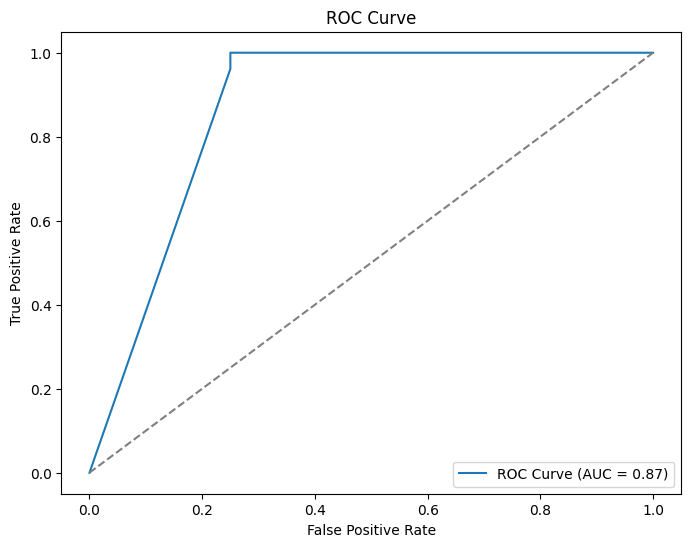

In [37]:
from sklearn.metrics import  roc_curve, auc


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()